In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas.io.json import json_normalize
import requests

pd.set_option('display.max_rows', 50)
%matplotlib inline 

In [2]:
address = "http://165.227.157.145:8080/api/do_measurement?x=-10"
r = requests.get(address)
data = r.json()
dataset_1000 = json_normalize(data)

In [3]:
for x in range(-9, 11):
    number = str(x)
    address = "http://165.227.157.145:8080/api/do_measurement?x="
    api_address = address + number
    r = requests.get(api_address)
    data = r.json()
    row = json_normalize(data)
    dataset_1000 = dataset_1000.append(row)

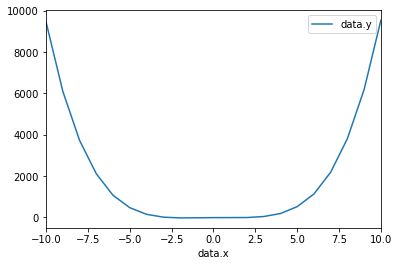

In [4]:
dataset_1000.plot(x = "data.x", y = "data.y");

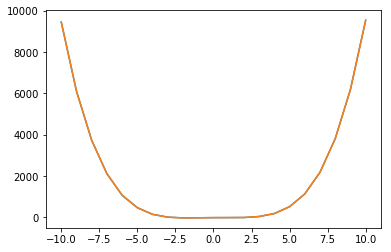

In [6]:
x = dataset_1000['data.x']
y = dataset_1000['data.y']

p = np.polyfit(x, y, 4) 

yfit = np.polyval(p, x)

plt.plot(x, y, label = 'data')
plt.plot(x, yfit, label = 'fit')

In [7]:
p

array([ 1.00036152, -0.00754882, -4.9953179 ,  5.40735151, -6.39571122])

In [14]:
x = -3
y = (p[0]*x**4) + (p[1]*x**3) + (p[2]*x**2) + (p[3]*x )+ p[4]
y

13.657474412082779

In [38]:
degree = len(p) - 1
print('y = ', end = '')
for x in reversed(range(len(p))):
    polynom = str(p[degree-x]) + '*x**' + str(x)
    print(polynom, end = ' + ')

y = 1.00036152098*x**4 + -0.00754881878388*x**3 + -4.99531790413*x**2 + 5.40735151298*x**1 + -6.39571121852*x**0 + 